## Imports

In [1]:
import keras
import os
import tensorflow as tf
from keras.callbacks import CSVLogger, EarlyStopping
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import  Conv2D, MaxPooling2D, Flatten
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD

## Dataset and preprocessing

In [2]:
# Define the parameters for the training
batch_size = 128
num_classes = 10 
epochs = 100 
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models') 
model_name = 'keras_cifar10_trained_model.h5' # Model name

In [3]:
# Splits the data between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Converts the vectors to one hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Model

In [4]:
model = Sequential()

#Layer 1 
model.add(Conv2D(filters=48, kernel_size=(3,3), 
                 strides=(1,1), padding='same', 
                 input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)) )

#Layer 2
model.add(Conv2D(filters=96, kernel_size=(3,3), padding='same') )
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#Layer 3
model.add(Conv2D(filters=192, kernel_size=(3,3), 
                  activation='relu', padding='same') )

#Layer 4
model.add(Conv2D(filters=192, kernel_size=(3,3), 
                  activation='relu', padding='same') )

#Layer 5
model.add(Conv2D(filters=256, kernel_size=(3,3), 
                 activation='relu', padding='same') )
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)) )

model.add(Flatten())

#Layer 6
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

#Layer 7 
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

#Prediction
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [5]:
model.compile(loss="categorical_crossentropy",
              optimizer=SGD(lr=0.01, momentum=0.9, decay=0.0005),
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          shuffle=True,
          epochs=100,
          validation_data=(x_test, y_test),
          callbacks=[EarlyStopping(min_delta=0.001, patience=3)])

# Evaluate the model
scores = model.evaluate(x_test, y_test)

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/100
391/391 [==============================] - 15s 38ms/step - loss: 1.7188 - accuracy: 0.3676 - val_loss: 1.6817 - val_accuracy: 0.4053
Epoch 2/100
391/391 [==============================] - 14s 36ms/step - loss: 1.2935 - accuracy: 0.5439 - val_loss: 1.1602 - val_accuracy: 0.6000
Epoch 3/100
391/391 [==============================] - 14s 36ms/step - loss: 1.0594 - accuracy: 0.6355 - val_loss: 1.1970 - val_accuracy: 0.5996
Epoch 4/100
391/391 [==============================] - 14s 36ms/step - loss: 0.9186 - accuracy: 0.6869 - val_loss: 0.8504 - val_accuracy: 0.7050
Epoch 5/100
391/391 [==============================] - 14s 37ms/step - loss: 0.8070 - accuracy: 0.7286 - val_loss: 0.9030 - val_accuracy: 0.6922
Epoch 6/100
391/391 [==============================] - 14s 36ms/step - loss: 0.7230 - accuracy: 0.7579 - val_loss: 0.8182 - val_accuracy: 0.7252
Epoch 7/100
391/391 [==============================] - 14s 36ms/step - loss: 0.6391 - accuracy: 0.7876 - val_loss: 0.7931 - val_ac

313/313 - 1s
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[841   7  20   6   7   2   1  10  49  57]
 [ 19 835   3   5   1   7   2   1  18 109]
 [ 73   6 706  44  55  46  11  22  14  23]
 [ 28   1  46 585  51 171  14  39  20  45]
 [ 17   2  47  33 742  46   7  80  16  10]
 [ 15   2  23 113  20 745   2  48  14  18]
 [ 17   7  58 110  70  38 640  12  14  34]
 [ 14   3  14  20  29  34   0 859   5  22]
 [ 42   6   7   7   0   0   1   3 904  30]
 [ 11  28   3   2   2   1   0   5  20 928]]


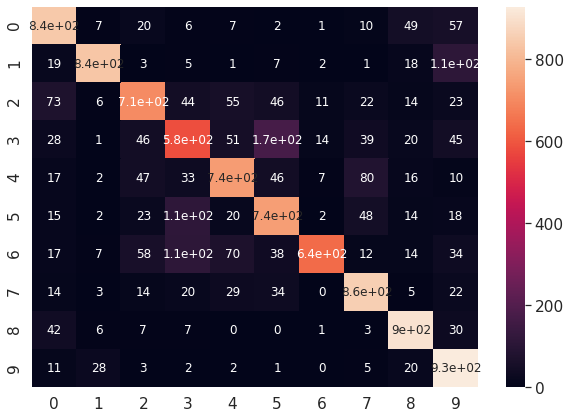

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()